In [2]:
import numpy as np

# 初始化数据字典
data = {
    'features': [],
    'adj_list': [],
    'targets': []
}

# 定义图的数量和节点范围
num_graphs = 200
node_range = (6, 8)

# 生成每个图的随机节点数
num_nodes_per_graph = np.random.randint(node_range[0], node_range[1] + 1, num_graphs)

# 生成随机节点特征
for num_nodes in num_nodes_per_graph:
    # 为每个节点生成随机特征值，部分为负值
    #pos_features = np.random.randint(64, 1520, num_nodes // 2)  # 上行数据包节点（正值）
    #neg_features = -np.random.randint(64, 1520, num_nodes - num_nodes // 2)  # 下行数据包节点（负值）
    #node_features = np.concatenate((pos_features, neg_features))
    node_features = np.random.randint(64, 1520, num_nodes) 
    np.random.shuffle(node_features)  # 打乱特征顺序
    data['features'].append(node_features)

# 创建邻接矩阵
for num_nodes in num_nodes_per_graph:
    # 初始化空邻接矩阵
    adj_matrix = np.zeros((num_nodes, num_nodes))
    # 随机连接节点并设置边属性
    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            if np.random.rand() > 0.5:  # 随机决定是否存在边
                adj_matrix[i, j] = np.random.choice([0.01, 1])  # 随机设置边属性为0.01或1
                adj_matrix[j, i] = adj_matrix[i, j]  # 确保对称性
    data['adj_list'].append(adj_matrix)

# 分配目标类到每个图，根据指定的分布
class_distribution = {1: 80, 2: 10, 3: 50, 4: 20, 5: 15, 6: 25}
for cls, count in class_distribution.items():
    data['targets'].extend([cls] * count)

# 打乱目标类以确保随机分布
np.random.shuffle(data['targets'])

# 验证分布
unique, counts = np.unique(data['targets'], return_counts=True)

# 输出结果
print(f"Total number of targets: {len(data['targets'])}")
print(f"Distribution of classes: {dict(zip(unique, counts))}")

# 打印前5个图的特征和邻接矩阵以验证结果
#for i in range(5):
    #print(f"Graph {i + 1} features:", data['features'][i])
    #print(f"Graph {i + 1} adjacency matrix:\n{data['adj_list'][i]}\n")

Total number of targets: 200
Distribution of classes: {1: 80, 2: 10, 3: 50, 4: 20, 5: 15, 6: 25}


In [3]:
# 打印 data['features'] 的长度
print("Length of data['features']:", len(data['features']))

        # 打印 data['adj_list'] 的长度
print("Length of data['adj_list']:", len(data['adj_list']))

        # 打印 data['targets'] 的长度
print("Length of data['targets']:", len(data['targets']))

        # 计算并打印每个类别的样本个数总和
unique_classes, counts = np.unique(data['targets'], return_counts=True)
for cls, count in zip(unique_classes, counts):
    print(f"Class {cls}: {count} samples")

Length of data['features']: 200
Length of data['adj_list']: 200
Length of data['targets']: 200
Class 1: 80 samples
Class 2: 10 samples
Class 3: 50 samples
Class 4: 20 samples
Class 5: 15 samples
Class 6: 25 samples


In [4]:
from aug import DataAugmentation

data_augmentation_instance = DataAugmentation(data)
augmented_data = data_augmentation_instance.augment()

# 打印结果以验证增强效果
print("Augmented Features:", len(augmented_data['features']))
print("Augmented Targets:", len(augmented_data['targets']))

        # 计算并打印每个类别的样本个数总和
unique_classes, counts = np.unique(augmented_data['targets'], return_counts=True)
for cls, count in zip(unique_classes, counts):
    print(f"Class {cls}: {count} samples")




Starting data augmentation...
Class 2: augmentation beigin
Class augmentation into data_augmentation
Class augmentation into 补充_augmentation
Class 2: augmentation completed


100%|██████████| 40/40 [00:00<00:00, 459649.75it/s]


Class 4: augmentation beigin
Class augmentation into data_augmentation
Class augmentation into 补充_augmentation
Class 4: augmentation completed


100%|██████████| 40/40 [00:00<00:00, 522654.70it/s]


Class 5: augmentation beigin
Class augmentation into data_augmentation
Class augmentation into 补充_augmentation
Class 5: augmentation completed


100%|██████████| 40/40 [00:00<00:00, 457144.85it/s]


Class 6: augmentation beigin
Class augmentation into data_augmentation
Class augmentation into 补充_augmentation
Class 6: augmentation completed


100%|██████████| 40/40 [00:00<00:00, 553703.50it/s]

Augmented Features: 240
Augmented Targets: 240
Class 1: 40 samples
Class 2: 40 samples
Class 3: 40 samples
Class 4: 40 samples
Class 5: 40 samples
Class 6: 40 samples


In [7]:
print(len(data['features']))
import augmentors as A
aug1 = A.Identity()
aug2 = A.RandomChoice([A.RWSampling(num_seeds=1000, walk_length=10),
                        A.NodeDropping(pn=0.1),
                        A.FeatureMasking(pf=0.1),
                        A.EdgeRemoving(pe=0.1)], 1)


200


Before Augmentation:


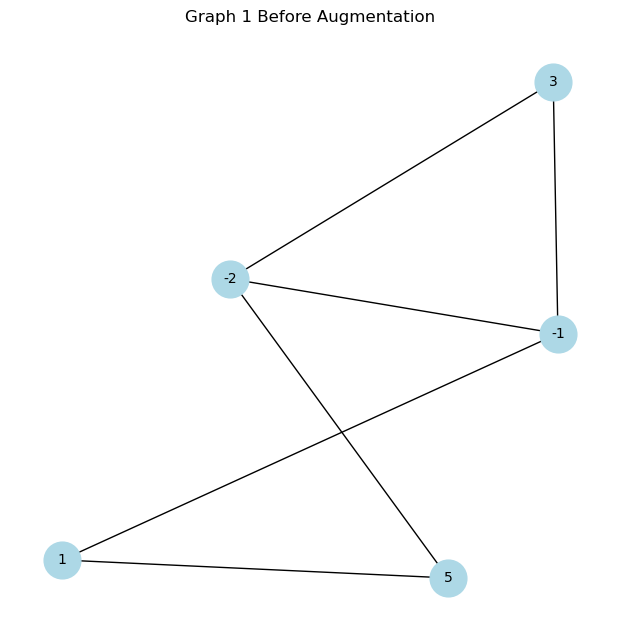

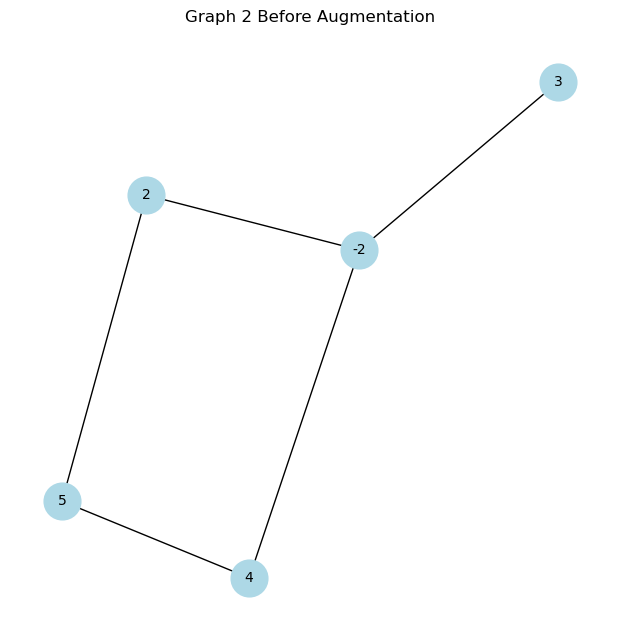

After Augmentation:


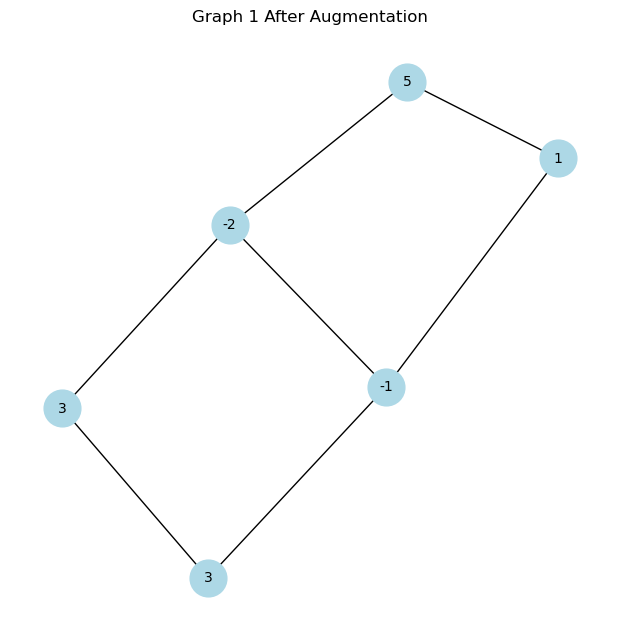

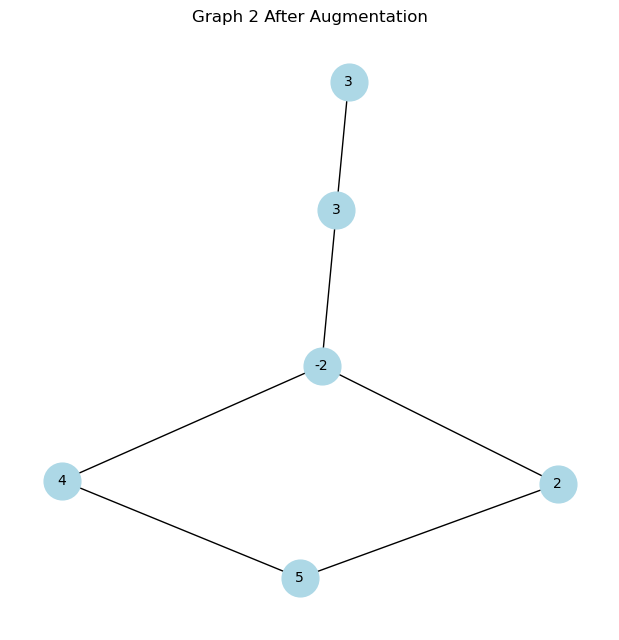

In [3]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from aug import DataAugmentation  # 确保 aug.py 文件中有 DataAugmentation 类

# 随机生成3个图，每个图有10个节点，节点特征值从64-1414随机取值
data = {
    'features': [],
    'adj_list': []
}

# 第一个图
features1 = np.array([3, -2, -1, 5, 1])
adj_matrix1 = np.zeros((5, 5))
edges1 = [(0, 1), (1, 2), (0, 2), (1, 3), (3, 4), (2, 4)]
for i, j in edges1:
    adj_matrix1[i, j] = 1
    adj_matrix1[j, i] = 1

data['features'].append(features1)
data['adj_list'].append(adj_matrix1)

# 第二个图
features2 = np.array([3, -2, 2, 5, 4])
adj_matrix2 = np.zeros((5, 5))
edges2 = [(0, 1), (1, 2), (1, 4), (2, 3), (3, 4)]
for i, j in edges2:
    adj_matrix2[i, j] = 1
    adj_matrix2[j, i] = 1

data['features'].append(features2)
data['adj_list'].append(adj_matrix2)

# 绘制图的函数
def plot_graph(features, adj_matrix, title):
    G = nx.Graph()
    num_nodes = len(features)
    G.add_nodes_from(range(num_nodes))
    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            if adj_matrix[i, j] > 0:
                G.add_edge(i, j)
    pos = nx.spring_layout(G)
    plt.figure(figsize=(6, 6))
    nx.draw(G, pos, node_size=700, node_color='lightblue', font_size=10, with_labels=False)
    node_labels = {i: features[i] for i in range(num_nodes)}
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10, font_color='black')
    plt.title(title)
    plt.show()

# 绘制生成的3个图（增强前）
print("Before Augmentation:")
for idx in range(2):
    plot_graph(data['features'][idx], data['adj_list'][idx], f"Graph {idx + 1} Before Augmentation")

# 创建 DataAugmentation 实例
data_augmentation_instance = DataAugmentation(data)

# 定义插入比例
insertion_ratio = 0.2

# 调用 DataAugmentation 类的 add_node 方法进行增强操作
augmented_data = {
    'features': [],
    'adj_list': []
}

for idx in range(2):
    features = data['features'][idx]
    adj_matrix = data['adj_list'][idx]
    
    # 调用 add_node 方法并传入必要参数
    augmented_adj_matrix,augmented_features  = data_augmentation_instance.add_node(features, adj_matrix, insertion_ratio)
    
    augmented_data['features'].append(augmented_features)
    augmented_data['adj_list'].append(augmented_adj_matrix)

# 绘制增强后的3个图
print("After Augmentation:")
for idx in range(2):
    plot_graph(augmented_data['features'][idx], augmented_data['adj_list'][idx], f"Graph {idx + 1} After Augmentation")




In [ ]:
from dataprocessor import DataProcessor

# 初始化数据处理器并处理数据
processor = DataProcessor(data)
processor.process()

unique_classes, counts = np.unique(processor.data['targets'], return_counts=True)
for cls, count in zip(unique_classes, counts):
    print(f"Class {cls}: {count} samples")